In [72]:
from scipy import optimize,arange
from numpy import array
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

## Baseline model - Cournot Competition

In [73]:
def demand_good_x(xi,xj):
    """
    This function decides the demand given the quantity produced by firms i and j. This means that this function decides
    the price of the good. This works because the goods are homogenous and operate under the same market.
    
    xi: The good produced by firm i
    xj: The good produced by firm j
    120: This constant defines the quantity for which demand and thereby the price is equal to zero
    """
    return 120-(xi+xj)


def cost_good_x(x):
    """
    This is the cost function that defines the production costs of good x given the amount produced. 
    The function is of such form that is only catches variable cost, and that there therefore is no fixed costs.
    
    x: the quantity of good x
    """
    return 30*x

In [74]:
def profit(xi,xj):
    """
    This profit function is of the original form and is used to find the optimal production.
    
    xi: The good produced by firm i
    xj: The good produced by firm j
    """
    return demand_good_x(xi,xj)*xi-cost_good_x(xi)

In [75]:
def best_response(xj):
    """
    This function is derived from the profit function by taking the derevation with regards to xi and isolating xi.
    
    xi: The good produced by firm i
    xj: The good produced by firm j
    """
    xi = (90-xj)/2
    return xi

In [76]:
def vector_best_response(x):
    """
    Now we take the best response functions and generating a vector containing them this is then used to solve the system
    of functions that are driven from earlier functions. Because we are looking for the vector best responce, we minus the
    response functions from an x.
    
    x: creating the difference equation that is optimized.
    """
    return array(x)-array([best_response(x[1]),best_response(x[0])])

In [77]:
x0 = [40, 40]
results = optimize.fsolve(vector_reaction, x0)
print(results)

[30. 30.]


In [78]:
print('The profit is', profit(results[0],results[1]))

The profit is 900.0


## Simulation 1 - Collusion

In [126]:
x_grid = np.linspace(10, 45, 100)
xvalue = []
profits = []

for x in x_grid:
    profit(x,x)
    xvalue.append(x)
    profits.append(profit(x,x))

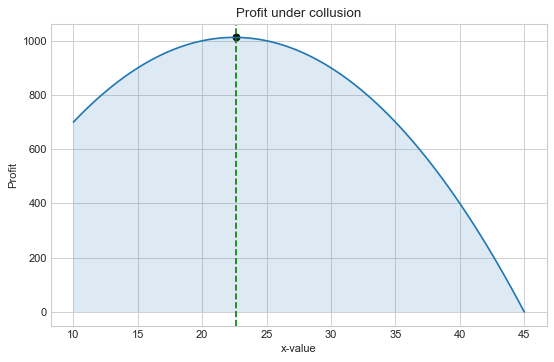

In [131]:
fig = plt.figure(figsize=(8, 5), dpi=80)
ax = fig.add_subplot(1,1,1)
ax.plot(xvalue,profits)
ax.set_xlabel('x-value')
ax.set_ylabel('Profit')
ax.set_title('Profit under collusion')
ax.axvline(x=22.63, color='green',linestyle = 'dashed')
ax.scatter(22.63,1012.47, color='black')
ax.fill_between(xvalue,profits, alpha=0.15)

In [81]:
optimum_profit = max(profits)
optimum_quantity = xvalue[profits.index(max(profits))]

print('The optimal proft occurs when the two companies collude and produce', "%.2f" % optimum_quantity, 'units and gaining', "%.2f" % optimum_profit, 'as profits')

The optimal proft occurs when the two companies collude and produce 22.63 units and gaining 1012.47 as profits


## Simulation 2 - Deviation from collusion

In [82]:
x_grid = np.linspace(10, 60, 100)
xvalue_deviate = []
profits_deviate = []

for x in x_grid:
    xvalue_deviate.append(x)
    profits_deviate.append(profit(x,22.62))

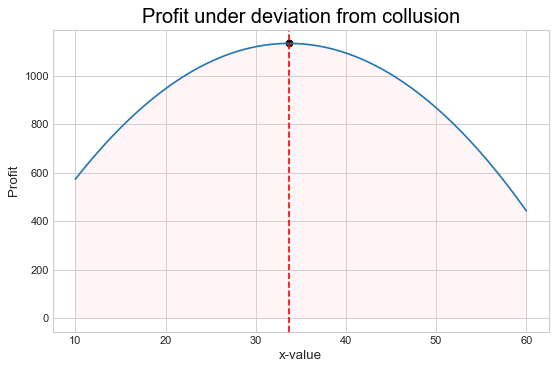

In [143]:
fig = plt.figure(figsize=(8, 5), dpi=80)
ax = fig.add_subplot(1,1,1)
ax.plot(xvalue_deviate,profits_deviate)
ax.set_xlabel('x-value', fontsize=12)
ax.set_ylabel('Profit', fontsize=12)
ax.set_title('Profit under deviation from collusion', fontsize=18, color='black')
ax.axvline(x=33.74, color='red',linestyle = 'dashed')
ax.scatter(33.74,1135.01, color='black')
ax.fill_between(xvalue_deviate,profits_deviate, color='pink', alpha=0.15)

In [69]:
optimum_deviated_profit = max(profits_deviate)
optimum_deviated_quantity = xvalue_deviate[profits_deviate.index(max(profits_deviate))]

print('Profit =', optimum_deviated_profit, 'and quantity for firm i = ', optimum_deviated_quantity)

Profit = 1135.013855729007 and quantity for firm i =  33.737373737373744


In [70]:
profit_collude = optimum_profit+optimum_profit
profit_deviate = profit(33.74,22.62)+profit(22.62,33.74)

In [71]:
print(profit_collude, profit_deviate)

2024.936230996837 1895.9504000000002
